In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree, svm
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score

from tqdm.auto import tqdm

In [2]:
digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# KNN

In [3]:
# Testing diffrent test sizes to see which one has the best preformance. 
# We will be looking at values between .1 and .5 taking step sizes of .05

test_accuracy_score = [] 
train_accuracy_score = []
for i in np.linspace(.1,.5,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    classifier = KNeighborsClassifier().fit(X_train, y_train)

    y_test_pred = classifier.predict(X_test)
    test_accuracy_score.append(accuracy_score(y_test, y_test_pred))

    y_train_pred = classifier.predict(X_train)
    train_accuracy_score.append(accuracy_score(y_train, y_train_pred))

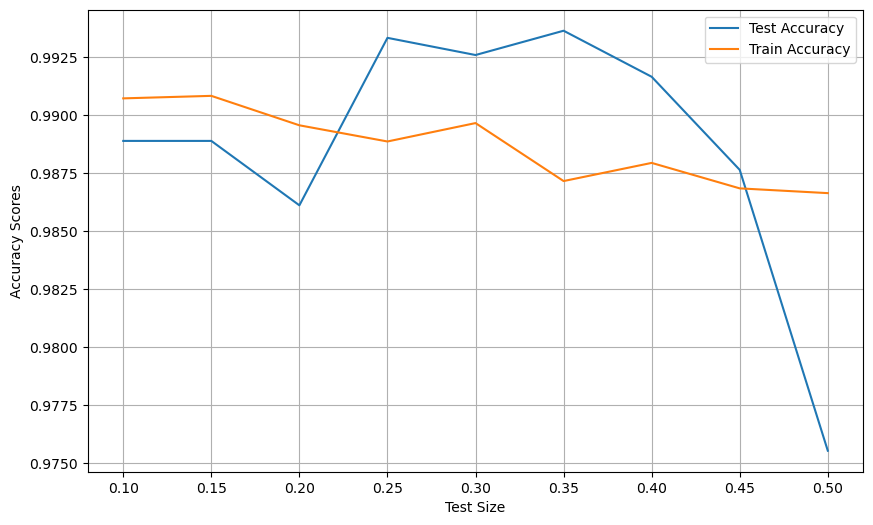

In [4]:
#plotting average test and training accuracys for diffrent test sizes

X_axis =  np.linspace(.1,.5,9)

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(X_axis, test_accuracy_score, label = 'Test Accuracy')
plt.plot(X_axis, train_accuracy_score, label = 'Train Accuracy')
plt.legend()
plt.xlabel("Test Size")
plt.ylabel("Accuracy Scores")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=X_axis[
    np.argmax(test_accuracy_score)], random_state=42)

print("Best test size: ", X_axis[np.argmax(test_accuracy_score)])

Best test size:  0.35


***Hyperparameters to be tested***

In [6]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']}


In [7]:
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, knn_param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

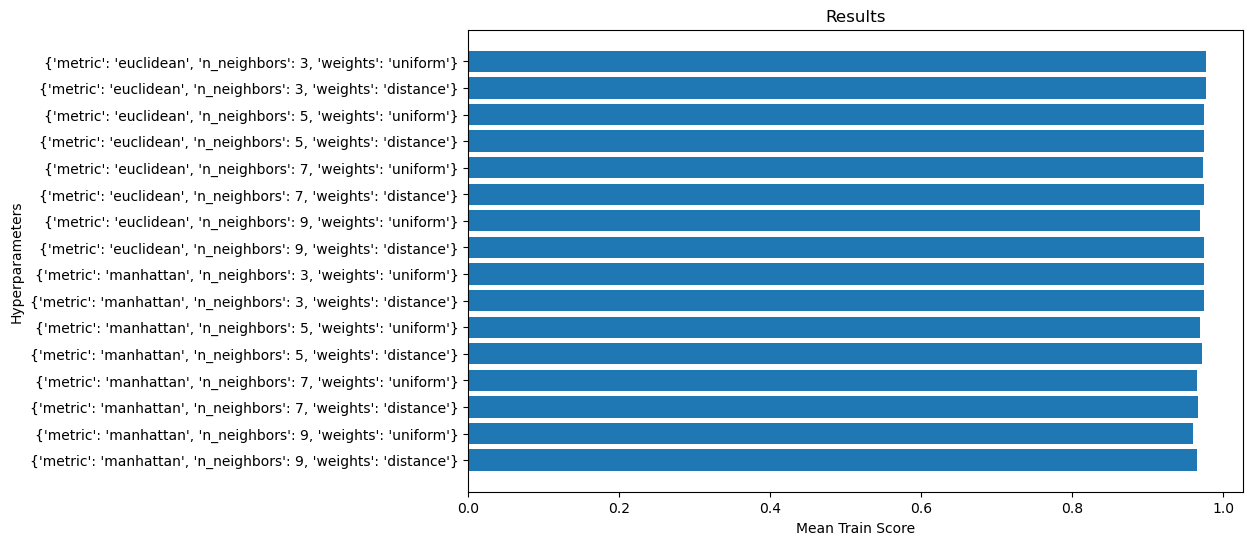

In [8]:
results = grid_search.cv_results_
# Extract the mean cross-validation scores and hyperparameters
mean_scores = results['mean_test_score']
params = results['params']

# Convert hyperparameters to strings for plotting
param_strings = [str(param) for param in params]

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(param_strings)), mean_scores, align='center')
plt.yticks(np.arange(len(param_strings)), param_strings)
plt.xlabel('Mean Train Score')
plt.ylabel('Hyperparameters')
plt.title('Results')
plt.gca().invert_yaxis()  # Invert y-axis to display top-to-bottom
plt.show()

In [9]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test set accuracy with best parameters:", grid_search.score(X_test, y_test))

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9777410953376618
Test set accuracy with best parameters: 0.9904610492845787


# Decision Tree

In [10]:
# Testing diffrent test sizes to see which one has the best preformance. 
# We will be looking at values between .1 and .5 taking step sizes of .05

test_accuracy_score = [] 
train_accuracy_score = []
for i in np.linspace(.1,.5,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    classifier = tree.DecisionTreeClassifier().fit(X_train, y_train)

    y_test_pred = classifier.predict(X_test)
    test_accuracy_score.append(accuracy_score(y_test, y_test_pred))

    y_train_pred = classifier.predict(X_train)
    train_accuracy_score.append(accuracy_score(y_train, y_train_pred))

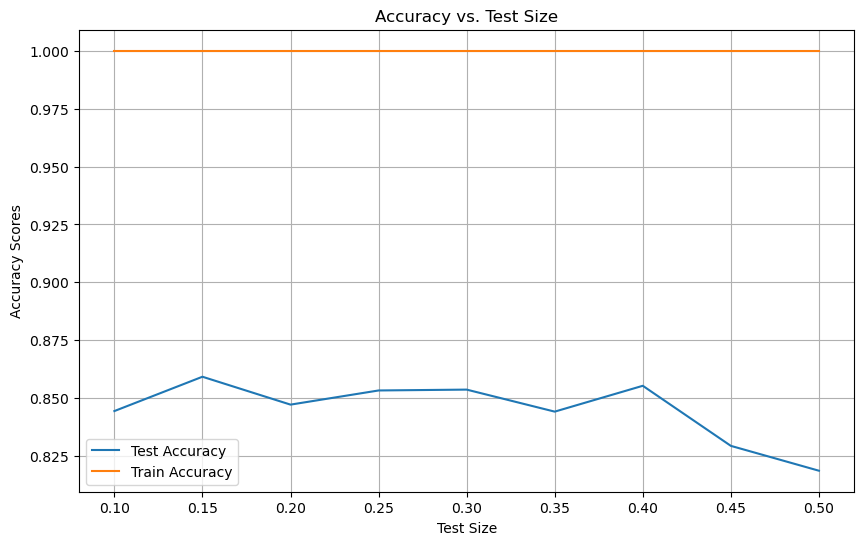

In [11]:
#plotting average test and training accuracys for diffrent test sizes

X_axis =  np.linspace(.1,.5,9)

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(X_axis, test_accuracy_score, label = 'Test Accuracy')
plt.plot(X_axis, train_accuracy_score, label = 'Train Accuracy')
plt.legend()
plt.title('Accuracy vs. Test Size')
plt.xlabel("Test Size")
plt.ylabel("Accuracy Scores")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=X_axis[
    np.argmax(test_accuracy_score)], random_state=42)

print("Best test size: ", X_axis[np.argmax(test_accuracy_score)])

Best test size:  0.15000000000000002


***Hyperparameters to be tested***

In [13]:
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [14]:
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), tree_param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

C:\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


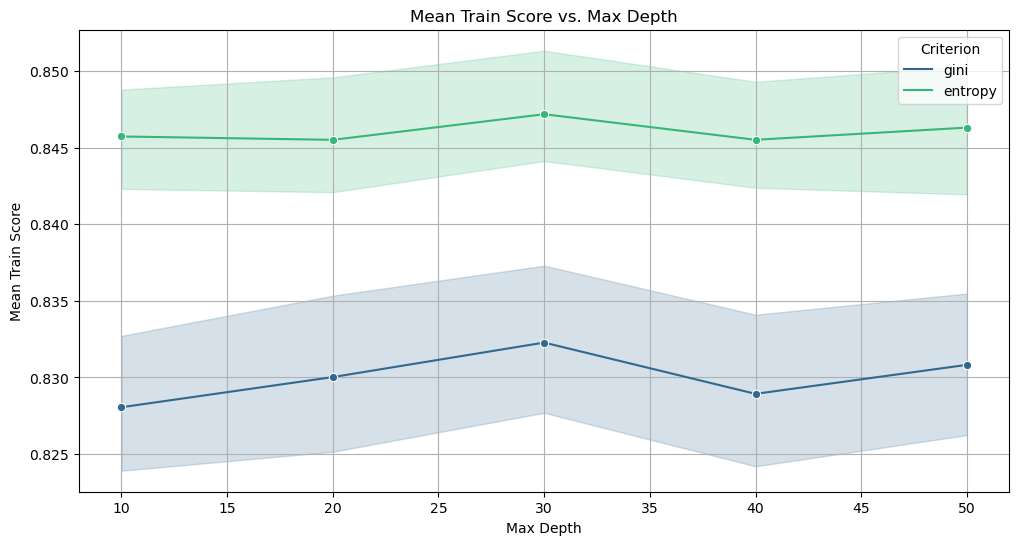

In [15]:
results = pd.DataFrame(grid_search.cv_results_)

# Plotting accuracy vs. hyperparameters
plt.figure(figsize=(12, 6))

# Plotting mean training score
sns.lineplot(data=results, x='param_max_depth', y='mean_test_score', hue='param_criterion', marker='o', palette='viridis')
plt.title('Mean Train Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Train Score')
plt.legend(title='Criterion')
plt.grid(True)

plt.show()

In [16]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test accuracy with best parameters:", grid_search.score(X_test, y_test))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.8611528983177971
Test accuracy with best parameters: 0.8925925925925926


In [17]:
clf = tree.DecisionTreeClassifier(**grid_search.best_params_)
path1 = clf.cost_complexity_pruning_path(X_train, y_train)
alphas1, impurities1 = path1.ccp_alphas, path1.impurities

In [18]:
# We will test each alpha value to see which give the best accuracy.
# The data will be split dependent on the best scoring test size from the previous Experiment

clfs1 = []

for ccp_alpha in tqdm(alphas1):
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs1.append(clf)
    
scores = [clf.score(X_train, y_train) for clf in tqdm(clfs1)]
best_alpha = alphas1[np.argmax(scores)]
print("Best alpha:", best_alpha)

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Best alpha: 0.0


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

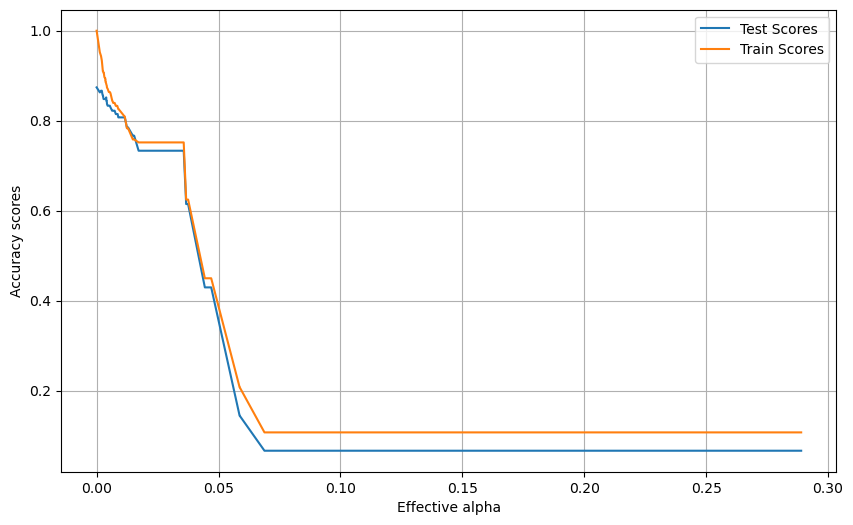

In [19]:
test_acc_scores1 = [accuracy_score(y_test, clf.predict(X_test)) for clf in tqdm(clfs1)]
train_acc_scores1 = [accuracy_score(y_train, clf.predict(X_train)) for clf in tqdm(clfs1)]

tree_depths = [clf.tree_.max_depth for clf in clfs1]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(alphas1[:-1], test_acc_scores1[:-1], label="Test Scores")
plt.plot(alphas1[:-1], train_acc_scores1[:-1], label = "Train Scores")
plt.xlabel("Effective alpha")
plt.ylabel("Accuracy scores")
plt.legend()
plt.show()

# Boosted Decision Tree

In [20]:
# Testing diffrent test sizes to see which one has the best preformance. 
# We will be looking at values between .1 and .5 taking step sizes of .05

test_accuracy_score = [] 
train_accuracy_score = []
for i in np.linspace(.1,.5,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    classifier = GradientBoostingClassifier().fit(X_train, y_train)

    y_test_pred = classifier.predict(X_test)
    test_accuracy_score.append(accuracy_score(y_test, y_test_pred))

    y_train_pred = classifier.predict(X_train)
    train_accuracy_score.append(accuracy_score(y_train, y_train_pred))

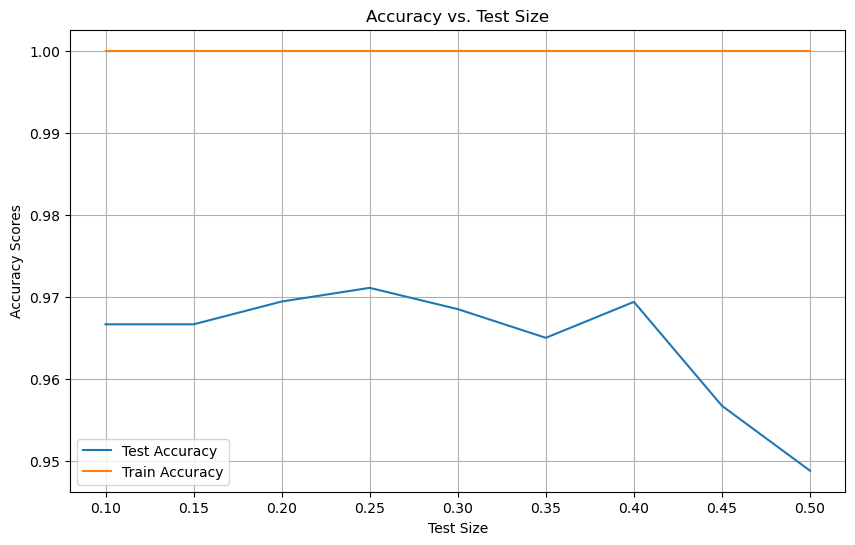

In [21]:
#plotting average test and training accuracys for diffrent test sizes

X_axis =  np.linspace(.1,.5,9)

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(X_axis, test_accuracy_score, label = 'Test Accuracy')
plt.plot(X_axis, train_accuracy_score, label = 'Train Accuracy')
plt.legend()
plt.title('Accuracy vs. Test Size')
plt.xlabel("Test Size")
plt.ylabel("Accuracy Scores")
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=X_axis[
    np.argmax(test_accuracy_score)], random_state=42)

print("Best test size: ", X_axis[np.argmax(test_accuracy_score)])

Best test size:  0.25


***Hyperparameters to be tested***

In [59]:
bdt_param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

In [60]:
grid_search = GridSearchCV(GradientBoostingClassifier(), bdt_param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [61]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test accuracy with best parameters:", grid_search.score(X_test, y_test))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score: 0.9651930894308943
Test accuracy with best parameters: 0.9777777777777777


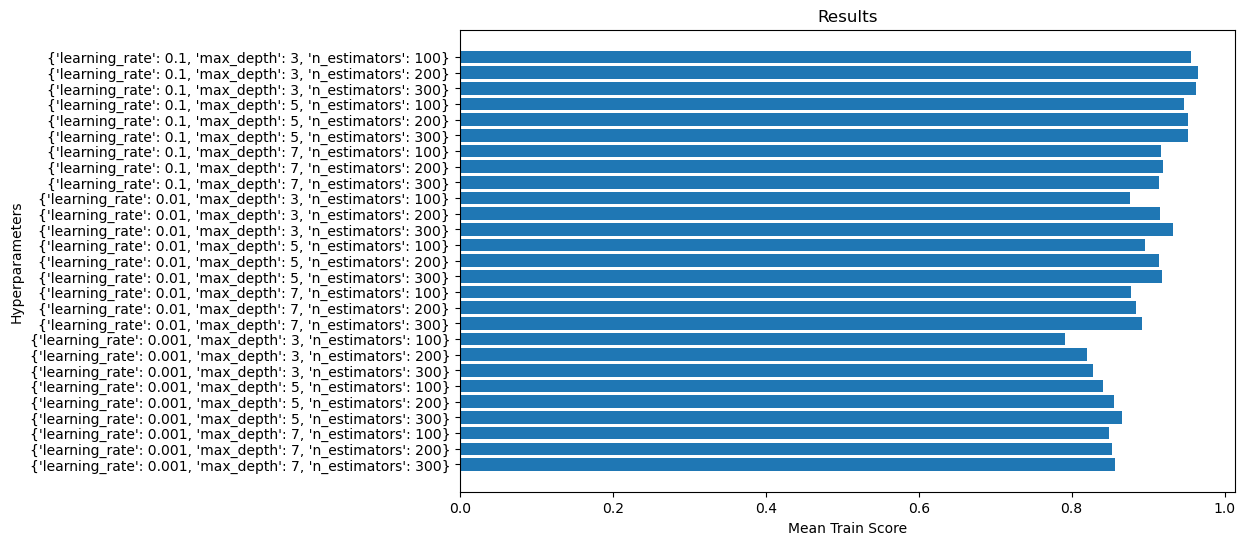

In [62]:
results = grid_search.cv_results_
# Extract the mean cross-validation scores and hyperparameters
mean_scores = results['mean_test_score']
params = results['params']

# Convert hyperparameters to strings for plotting
param_strings = [str(param) for param in params]

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(param_strings)), mean_scores, align='center')
plt.yticks(np.arange(len(param_strings)), param_strings)
plt.xlabel('Mean Train Score')
plt.ylabel('Hyperparameters')
plt.title('Results')
plt.gca().invert_yaxis()  # Invert y-axis to display top-to-bottom
plt.show()

# SVM

In [26]:
# Testing diffrent test sizes to see which one has the best preformance. 
# We will be looking at values between .1 and .5 taking step sizes of .05

test_accuracy_score = [] 
train_accuracy_score = []
for i in np.linspace(.1,.5,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    classifier = svm.SVC().fit(X_train, y_train)

    y_test_pred = classifier.predict(X_test)
    test_accuracy_score.append(accuracy_score(y_test, y_test_pred))

    y_train_pred = classifier.predict(X_train)
    train_accuracy_score.append(accuracy_score(y_train, y_train_pred))

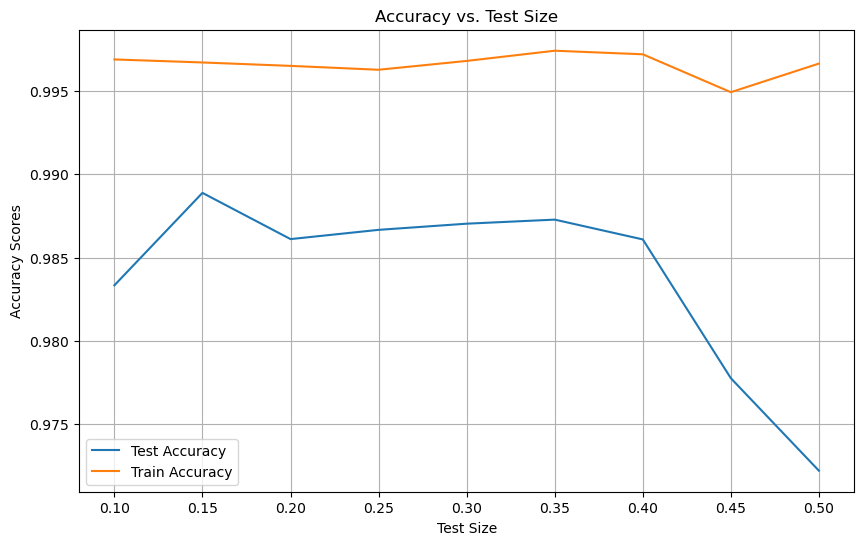

In [27]:
#plotting average test and training accuracys for diffrent test sizes

X_axis =  np.linspace(.1,.5,9)

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(X_axis, test_accuracy_score, label = 'Test Accuracy')
plt.plot(X_axis, train_accuracy_score, label = 'Train Accuracy')
plt.legend()
plt.title('Accuracy vs. Test Size')
plt.xlabel("Test Size")
plt.ylabel("Accuracy Scores")
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=X_axis[
    np.argmax(test_accuracy_score)], random_state=42)

print("Best test size: ", X_axis[np.argmax(test_accuracy_score)])

Best test size:  0.15000000000000002


***Hyperparameters to be tested***

In [29]:
svm_param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}


In [30]:
grid_search = GridSearchCV(svm.SVC(), svm_param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

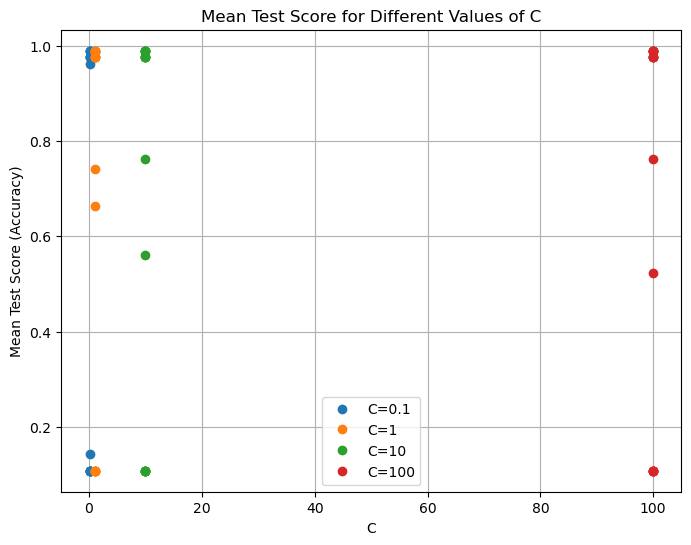

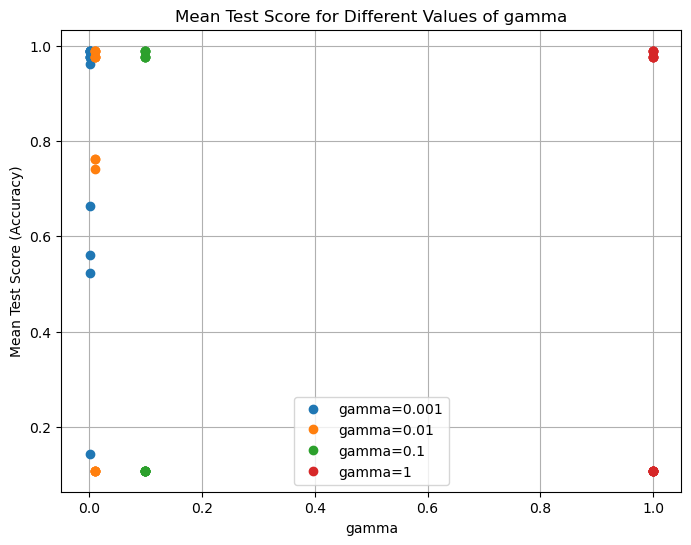

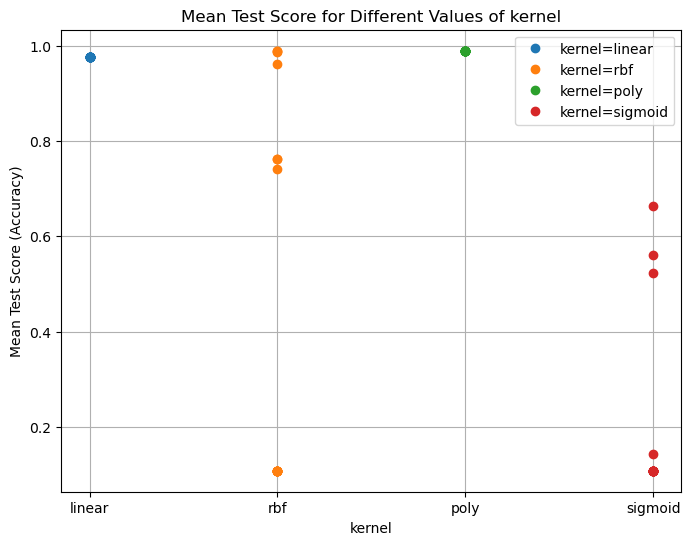

In [31]:
results = grid_search.cv_results_

# Extract parameter values and scores
params = results['params']
mean_test_scores = results['mean_test_score']

# Extract parameter names for plotting
param_names = list(params[0].keys())

# Fix other parameters and plot mean test score against the parameter of interest
for param_name in param_names:
    # Fix other parameters and their values
    fixed_params = {p: v for p, v in params[0].items() if p != param_name}
    
    # Group mean test scores by the parameter of interest
    grouped_scores = {}
    for param, score in zip(params, mean_test_scores):
        key = param[param_name]
        if key not in grouped_scores:
            grouped_scores[key] = []
        grouped_scores[key].append(score)
    
    # Plot mean test score against the parameter of interest
    plt.figure(figsize=(8, 6))
    for key, scores in grouped_scores.items():
        plt.plot([key] * len(scores), scores, 'o', label=f'{param_name}={key}')
    plt.title(f'Mean Test Score for Different Values of {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test accuracy with best parameters:", grid_search.score(X_test, y_test))

Best hyperparameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
Best cross-validation score: 0.9901810778956393
Test accuracy with best parameters: 0.9925925925925926


# Neural Network

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.long)

In [35]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)

In [36]:
class NeuralNetwork(nn.Module):
    def __init__(self,input_size, hidden_sizes, output_size):
        super(NeuralNetwork, self).__init__()
        layers = []
        
        for i in range(len(hidden_sizes)):
            if i == 0:
                layers.append(nn.Linear(input_size, hidden_sizes[i]))
            else:
                layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        logits = self.model(x)
        return logits

In [37]:
input_size = X_train.shape[1]
output_size = max(y_train)+1

In [38]:
batch_size = 32

# Create DataLoader for train and test data
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False)

In [39]:
def valid_acc(valid_loader):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        correct = 0
        total = 0
        for data, targets in valid_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, dim=1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        accuracy = 100 * correct / total
        return accuracy

In [40]:
def train_model(train_data):
    avg_loss = 0
    model.train()  # Set the model to training mode
    for batch_idx, (data, targets) in enumerate(train_data):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)
        avg_loss += int(loss)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return avg_loss/(batch_idx+1)

In [65]:
total_tloss = []
total_vacc = []
criterion = nn.CrossEntropyLoss()
hidden_sizes = [[32, 16, 8], [128, 64], [512, 256, 128, 64], [128, 256, 512, 256, 128, 64]]

models = []
for i in range(len(hidden_sizes)):
    models.append(NeuralNetwork(input_size, hidden_sizes[i], output_size))

for model in models:
    vacc = []
    tloss = []
    # Training loop
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    num_epochs = 10
    for epoch in tqdm(range(num_epochs)):
        tloss.append(train_model(train_loader))
        vacc.append(valid_acc(valid_loader))
        
    total_vacc.append(vacc)
    total_tloss.append(tloss)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

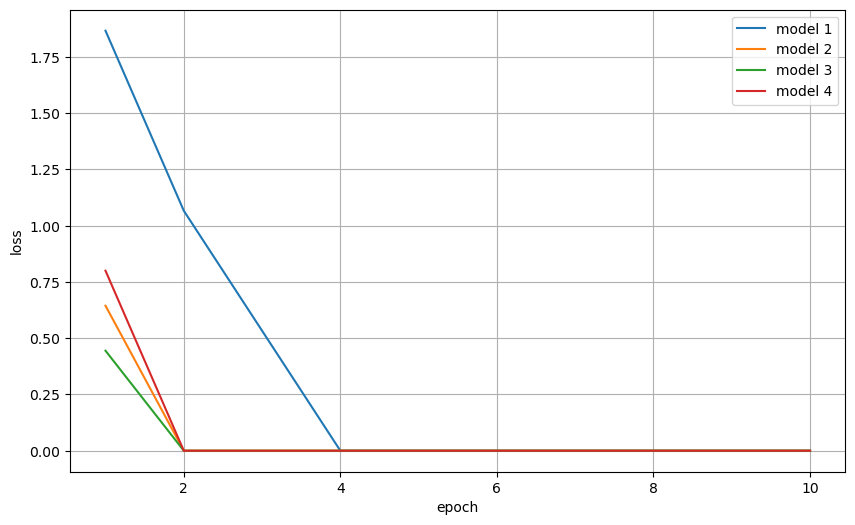

In [42]:
#plotting the training loss for diffrent hidden sizes

X_axis =  [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(X_axis, total_tloss[0], label = 'model 1')
plt.plot(X_axis, total_tloss[1], label = 'model 2')
plt.plot(X_axis, total_tloss[2], label = 'model 3')
plt.plot(X_axis, total_tloss[3], label = 'model 4')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

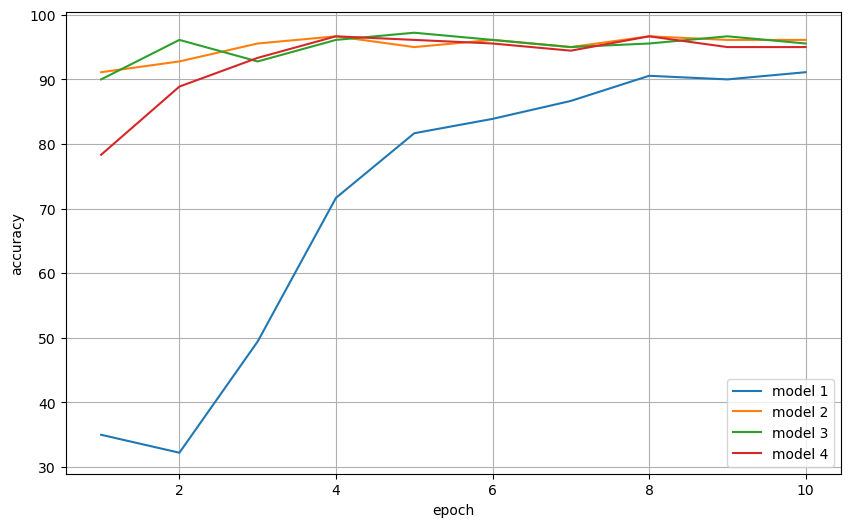

In [66]:
#plotting the validation acc for diffrent hidden sizes

X_axis =  [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(X_axis, total_vacc[0], label = 'model 1')
plt.plot(X_axis, total_vacc[1], label = 'model 2')
plt.plot(X_axis, total_vacc[2], label = 'model 3')
plt.plot(X_axis, total_vacc[3], label = 'model 4')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [44]:
vmax = 0
hidden_pos = 0
for i in range(len(total_vacc)):
    if max(total_vacc[i]) > vmax:
        vmax = max(total_vacc[i]) 
        hidden_pos = i
        
print(f"model {hidden_pos+1} had the highest valid acc at {vmax} with layers {hidden_sizes[hidden_pos]}")

model 2 had the highest valid acc at 98.33333333333333 with layers [128, 64]


In [45]:
best_model = models[hidden_pos]
best_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for data, targets in test_loader:
        outputs = best_model(data)
        _, predicted = torch.max(outputs, dim=1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 99.44%


In [46]:
epochs = [5, 10, 50, 100]
total_tloss = []
total_vacc = []
criterion = nn.CrossEntropyLoss()

models = []
for i in range(len(epochs)):
    models.append(NeuralNetwork(input_size, hidden_sizes[hidden_pos], output_size))
    
for i in range(len(epochs)):
    model = models[i]
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    tloss = []
    vacc = []
    for epoch in tqdm(range(epochs[i])):
        tloss.append(train_model(train_loader))
        vacc.append(valid_acc(valid_loader))
        
    total_vacc.append(vacc)
    total_tloss.append(tloss)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [47]:
vmax = 0
epoch_pos = 0
for i in range(len(total_vacc)):
    if max(total_vacc[i]) > vmax:
        vmax = max(total_vacc[i]) 
        epoch_pos = i
        
print(f"the best epoch size is {epochs[epoch_pos]} with the highest valid acc at {vmax}")

the best epoch size is 50 with the highest valid acc at 98.33333333333333


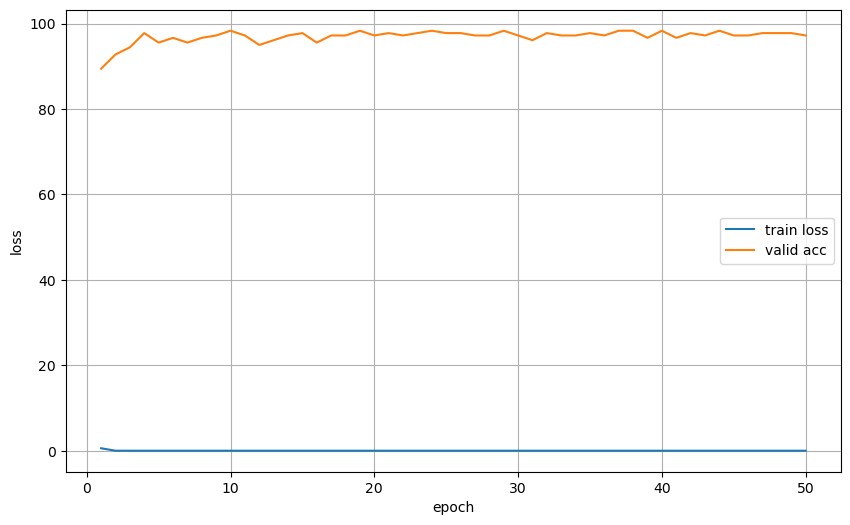

In [48]:
X_axis =  list(range(1, epochs[epoch_pos]+1))

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(X_axis, total_tloss[epoch_pos], label = 'train loss')
plt.plot(X_axis, total_vacc[epoch_pos], label = 'valid acc')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [49]:
best_model = models[epoch_pos]
best_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for data, targets in test_loader:
        outputs = best_model(data)
        _, predicted = torch.max(outputs, dim=1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 98.89%


In [50]:
lrs = [.1, .01, .005, .001]
total_tloss = []
total_vacc = []
criterion = nn.CrossEntropyLoss()

models = []
for i in range(len(lrs)):
    models.append(NeuralNetwork(input_size, hidden_sizes[hidden_pos], output_size))
    
for i in range(len(lrs)):
    model = models[i]
    optimizer = optim.Adam(model.parameters(), lr=lrs[i])
    tloss = []
    vacc = []
    for epoch in tqdm(range(epochs[epoch_pos])):
        tloss.append(train_model(train_loader))
        vacc.append(valid_acc(valid_loader))
        
    total_vacc.append(vacc)
    total_tloss.append(tloss)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [51]:
vmax = 0
lr_pos = 0
for i in range(len(total_vacc)):
    if max(total_vacc[i]) > vmax:
        vmax = max(total_vacc[i]) 
        lr_pos = i
        
print(f"learning rate of {lrs[lr_pos]} had the highest valid acc at {vmax}")

learning rate of 0.01 had the highest valid acc at 98.88888888888889


In [52]:
len(total_tloss)

4

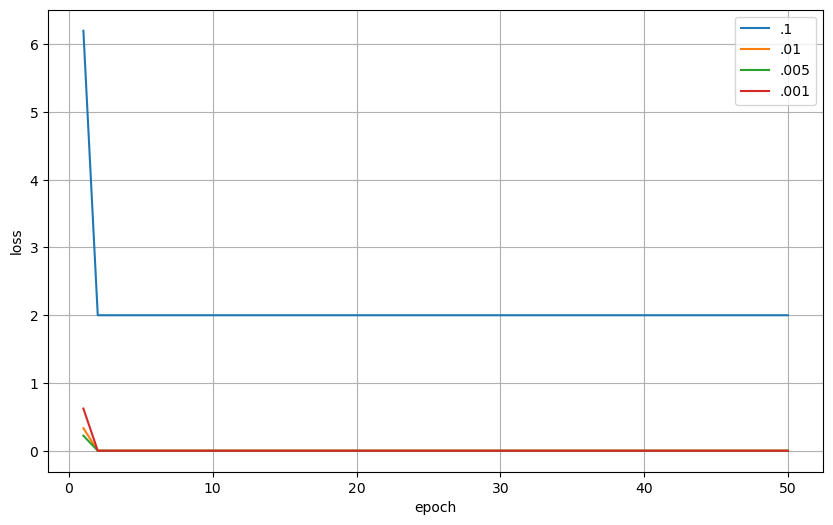

In [53]:
#plotting average test and training accuracys for diffrent test sizes

X_axis = list(range(1, epochs[epoch_pos]+1))

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(X_axis, total_tloss[0], label = '.1')
plt.plot(X_axis, total_tloss[1], label = '.01')
plt.plot(X_axis, total_tloss[2], label = '.005')
plt.plot(X_axis, total_tloss[3], label = '.001')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

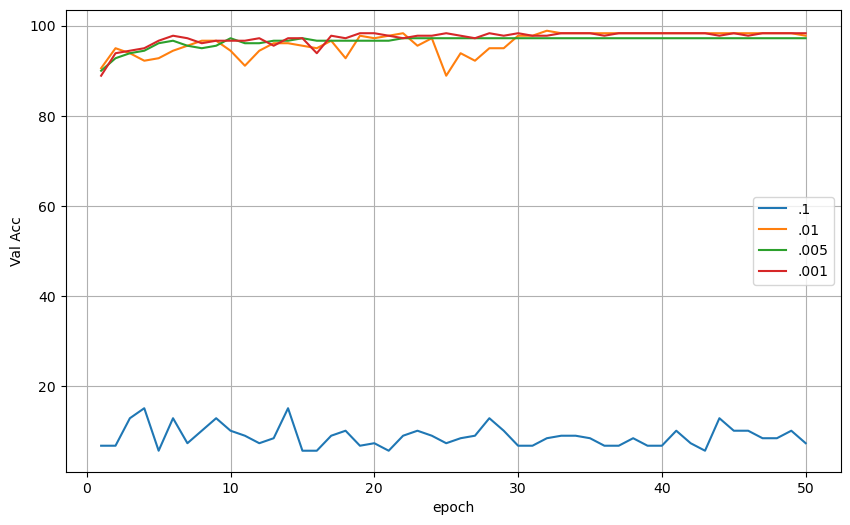

In [63]:
#plotting the validation acc for diffrent hidden sizes

X_axis =  list(range(1, epochs[epoch_pos]+1))

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(X_axis, total_vacc[0], label = '.1')
plt.plot(X_axis, total_vacc[1], label = '.01')
plt.plot(X_axis, total_vacc[2], label = '.005')
plt.plot(X_axis, total_vacc[3], label = '.001')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Val Acc")
plt.show()

In [56]:
best_model = models[lr_pos]
best_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for data, targets in test_loader:
        outputs = best_model(data)
        _, predicted = torch.max(outputs, dim=1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 97.78%
